<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
product = pd.read_csv('/content/drive/MyDrive/Dataset/product_data.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Dataset/reviews.csv')

In [5]:
product.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [6]:
reviews.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [7]:
print(product.shape)
print(reviews.shape)

(720, 10)
(67986, 8)


In [8]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [10]:
product.drop(['url','image'],axis=1,inplace=True)

In [11]:
product.columns

Index(['asin', 'brand', 'title', 'rating', 'reviewUrl', 'totalReviews',
       'price', 'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [12]:
product.describe(include='all')

,asin,brand,title,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,720,nan,nan,nan
top,B00N532A34,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,https://www.amazon.com/product-reviews/B07KX1L519,nan,nan,nan
freq,1,346,2,nan,1,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,NaN,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,NaN,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,NaN,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,NaN,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,NaN,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,NaN,122.2500000,336.7250000,0.0000000


In [13]:
reviews.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

Inferences on Product data:

1. Count of unique Products- 720
2. Top Brand name- Samsung
3. Top title -Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G LTE Octa-Core Phonew/ 12.2MP Camera - Just Black	
4. range of rating- Max:5 & Min:1
5. price range- as per given dta Max price is 999 & Min price is 0

inferences on Reviews data:

1. Count of unique Products- 720
2. Top name- Amazon Customer	
3. Top title - Five Stars
4. range of rating- Max:5 & Min:1

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

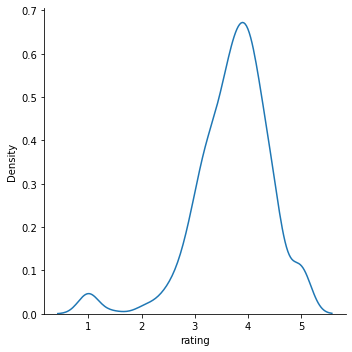

In [14]:
sns.displot(product, x='rating',kind="kde")

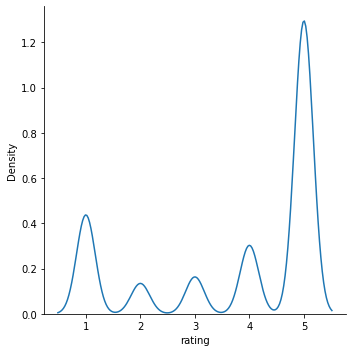

In [15]:
sns.displot(reviews, x='rating',kind="kde")

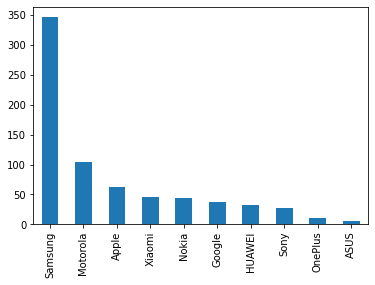

In [16]:
product['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

In [17]:
product.groupby('brand')['rating'].mean()

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

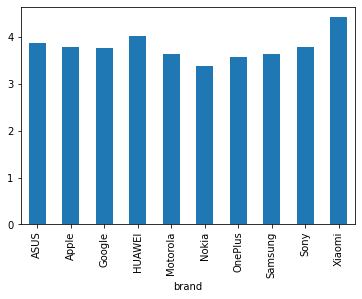

In [18]:
product.groupby('brand')['rating'].mean().plot(kind='bar')

### 4.6 Display average price per brand

In [19]:
product.groupby('brand')['price'].mean()

brand
ASUS       309.6860000
Apple      303.5811111
Google     241.8676316
HUAWEI     218.8290625
Motorola   139.1210476
Nokia      111.4438636
OnePlus    426.1960000
Samsung    256.5272543
Sony       332.7248148
Xiaomi     214.9676087
Name: price, dtype: float64

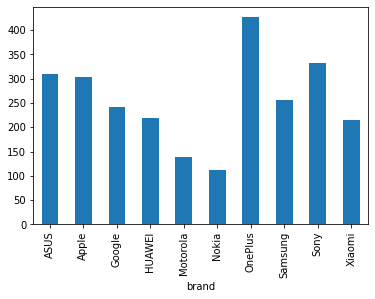

In [20]:
product.groupby('brand')['price'].mean().plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

In [21]:
product.groupby('brand')['totalReviews'].mean()

brand
ASUS        52.6000000
Apple      100.2380952
Google     111.5263158
HUAWEI      77.0937500
Motorola    89.7047619
Nokia      140.5000000
OnePlus     40.6000000
Samsung    108.9624277
Sony       122.6666667
Xiaomi     121.1739130
Name: totalReviews, dtype: float64

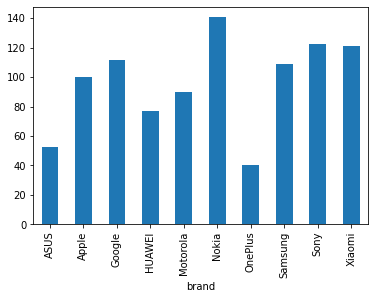

In [22]:
product.groupby('brand')['totalReviews'].mean().plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [23]:
product_reviews = pd.merge(reviews, product, on='asin', how='inner')

In [24]:
product_reviews.shape

(67986, 15)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [25]:
product_reviews.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [26]:
product_reviews.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title",
                                "rating_y": "overall_rating"}, inplace=True)

In [27]:
product_reviews.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [28]:
product_reviews['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [29]:
verified_reviews = product_reviews[product_reviews['verified']==True]

In [30]:
verified_reviews.shape

(61225, 15)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [31]:
verified_reviews.groupby('brand')['totalReviews'].count()

brand
ASUS          206
Apple        4876
Google       3163
HUAWEI       2019
Motorola     7714
Nokia        4878
OnePlus       304
Samsung     31020
Sony         2691
Xiaomi       4207
Name: totalReviews, dtype: int64

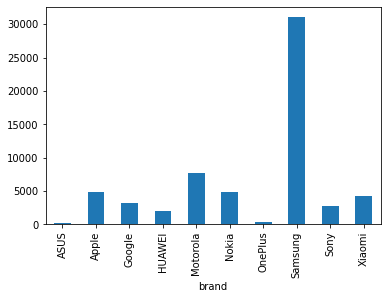

In [32]:
verified_reviews.groupby('brand')['totalReviews'].count().plot(kind='bar')

**samsung brand is having highest number of reviews.**

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [33]:
verified_reviews.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [34]:
verified_reviews.drop(['asin', 'reviewUrl',
       'totalReviews', 'originalPrice', 'name', 'overall_rating',
       'date', 'verified', 'item_title', 'helpfulVotes','price'],axis=1, inplace=True)

I have drop 'Price' column also as improper values observed like some mobiles are having 0 price.

In [35]:
verified_reviews.columns

Index(['user_rating', 'review_title', 'body', 'brand'], dtype='object')

In [36]:
verified_reviews.head(5)

,user_rating,review_title,body,brand
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola
18,5,Excellent product,The product has been very good. I had used thi...,Motorola
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

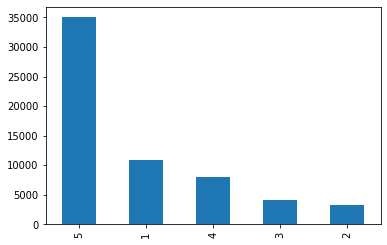

In [37]:
verified_reviews['user_rating'].value_counts().plot(kind='bar')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [38]:
verified_reviews["sentiment"] = verified_reviews['user_rating'].apply(lambda x:1 if x>3 else(0 if x==3 else(-1)))

In [39]:
verified_reviews["sentiment"].value_counts()

 1    42939
-1    14158
 0     4128
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

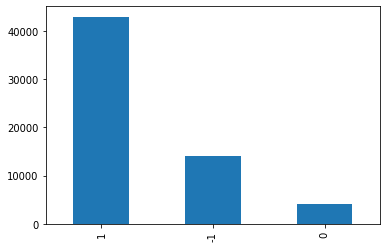

In [40]:
verified_reviews["sentiment"].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [41]:
pd.crosstab(verified_reviews['sentiment'],verified_reviews['brand']).T

sentiment,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


In [42]:
verified_reviews.corr()

,user_rating,sentiment
user_rating,1.0000000,0.9694496
sentiment,0.9694496,1.0000000


Observation:
1. As per correlation value ,'user_rating' and 'sentiment' are highly correlated with each other.
2. with the crosstab function we can observed that samsung is having  maximum count in positive as well as negative reviews.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [43]:
verified_reviews['body'].dtypes

dtype('O')

In [44]:
verified_reviews.sample(2)

,user_rating,review_title,body,brand,sentiment
9079,5,Good bang for your buck,"Price was good got it for my delivery driver, ...",Samsung,1
16212,3,"Works fine, current company i use for this pho...","Works fine, current company i use for this pho...",Samsung,0


In [45]:
verified_reviews['body']=verified_reviews['body'].astype('str').apply(lambda x: x.lower())

In [46]:
verified_reviews.sample(2)

,user_rating,review_title,body,brand,sentiment
25254,2,Don’t waste your money,i have had this phone for 2 months. today the ...,Samsung,-1
33108,1,Don't work !!??,i'm very upset i bought this phone and two day...,Samsung,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [47]:
verified_reviews['body'] = verified_reviews['body'].replace('[^\w\s]','',regex=True)

In [48]:
verified_reviews.sample(5)

,user_rating,review_title,body,brand,sentiment
32790,1,... have to pay to return this phone not a happy,now i have to pay to return this phone not a h...,Samsung,-1
32877,4,item is ok,i liked the item,Samsung,1
63990,2,Arrived damaged,arrived with a scratched screen quality does n...,Samsung,-1
32282,5,Five Stars,easy phone to use does everything i need it fo...,Samsung,1
61072,5,Great Product,love it,Samsung,1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [49]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stop = set(stopwords.words('english'))

In [51]:
verified_reviews['body'] = verified_reviews['body'].apply(lambda words: " ".join (word for word in words.split() if word not in stop))

In [52]:
verified_reviews['body'].head(5)

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [53]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
w_token = nltk.tokenize.WhitespaceTokenizer()
lemmatisation = nltk.stem.WordNetLemmatizer()

In [55]:
def lam_txt(text):
  out_text = [lemmatisation.lemmatize(word)for word in w_token.tokenize(text)]
  return out_text

In [56]:
verified_reviews['keywords'] = verified_reviews['body'].apply(lam_txt)
verified_reviews['clean_text']=verified_reviews['keywords'].apply(lambda x: " ".join([word for word in x]))

In [57]:
verified_reviews.sample(5)

,user_rating,review_title,body,brand,sentiment,keywords,clean_text
37133,5,This is an A+ seller -- great customer service,seller great customer service quality product ...,Google,1,"[seller, great, customer, service, quality, pr...",seller great customer service quality product ...
15063,5,Five Stars,excelent product,Nokia,1,"[excelent, product]",excelent product
67185,5,Best from Redmi,received expecting cellphone big screen really...,Xiaomi,1,"[received, expecting, cellphone, big, screen, ...",received expecting cellphone big screen really...
62297,4,A Decent Phone On Paper That's Riddled With Bu...,first warning even major update designed fix f...,Samsung,1,"[first, warning, even, major, update, designed...",first warning even major update designed fix f...
11166,5,Great phone for the price,phone easy use extremely easy set especially t...,Nokia,1,"[phone, easy, use, extremely, easy, set, espec...",phone easy use extremely easy set especially t...


### 5.5 Write a function to check word frequency of the text

In [58]:
def freq(str): 

	# break the string into list of words 
	str_list = str.split() 

	# gives set of unique words 
	unique_words = set(str_list) 
	
	for words in unique_words : 
		print('Frequency of ', words , 'is :', str_list.count(words)) 

In [59]:
if __name__ == "__main__": 
	str ='1 star phones locked pay additional fees unlock'
	freq(str) 

Frequency of  1 is : 1
Frequency of  locked is : 1
Frequency of  fees is : 1
Frequency of  unlock is : 1
Frequency of  pay is : 1
Frequency of  star is : 1
Frequency of  phones is : 1
Frequency of  additional is : 1


In [60]:
top_N = 20
dist = nltk.FreqDist(verified_reviews['body'])
print('All frequencies')

wf=pd.DataFrame(dist.most_common(top_N),columns=['Word','Frequency'])

print(wf)

All frequencies
             Word  Frequency
0            good        737
1     great phone        409
2            love        373
3           great        248
4      love phone        225
5       excellent        221
6       excelente        198
7      good phone        176
8         perfect        169
9              ok        144
10                       140
11           nice        136
12    works great        118
13     nice phone        109
14           like        102
15   good product        100
16  great product         95
17      muy bueno         73
18       excelent         65
19        awesome         64


### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [61]:
sentiments_1 = verified_reviews[verified_reviews['sentiment']==1]

In [62]:
pd.options.display.max_colwidth = 200
sentiments_1['body'].head(5)

18                                                                                                     product good used cell phone one projects worked wonders definitely recommend anyone interested buying
21    bought phone replace lg phone didnt like expected put old sim card new phone worked two serious drawbacks device related candy bar style first buttons exposed easy hit one accidentally second scre...
24                                                                                                                                                                                     served well back phone
26                                                                                                                               sturdy clarity great easy use problem speaker option big issue im living atm
28                                                       beautiful job used item att account good see bill little avoided big amount billsi would recommend product body good qu

In [63]:
if __name__ == "__main__": 
	str ='product good used cell phone one projects worked wonders definitely recommend anyone interested buying'
	freq(str) 

Frequency of  worked is : 1
Frequency of  anyone is : 1
Frequency of  product is : 1
Frequency of  wonders is : 1
Frequency of  used is : 1
Frequency of  definitely is : 1
Frequency of  one is : 1
Frequency of  buying is : 1
Frequency of  cell is : 1
Frequency of  phone is : 1
Frequency of  recommend is : 1
Frequency of  projects is : 1
Frequency of  good is : 1
Frequency of  interested is : 1


In [64]:
top_N = 20
dist = nltk.FreqDist(sentiments_1['body'])
print('All frequencies')
f=pd.DataFrame(dist.most_common(top_N),columns=['Word','Frequency'])
print(f)

All frequencies
             Word  Frequency
0            good        683
1     great phone        408
2            love        369
3           great        247
4      love phone        225
5       excellent        221
6       excelente        198
7      good phone        171
8         perfect        169
9            nice        129
10                       125
11             ok        120
12    works great        118
13     nice phone        107
14           like        101
15   good product         98
16  great product         93
17      muy bueno         73
18       excelent         65
19        awesome         63


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [66]:
tfidf_trans = tfidf.fit_transform(verified_reviews['clean_text'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [67]:
# tfidf_trans is independent features for building a classifier.

In [68]:
target = verified_reviews['sentiment'] #dependent features

### 5.9 Split the data into Train & Test Sets

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(tfidf_trans,target)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
n_estimators = 400
max_depth = 50

In [71]:
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
model.fit(x_train, y_train)
preds = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test , preds)

In [72]:
accuracy

0.7695172143463774

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, preds))

[[ 1146     0  2413]
 [   77     7   981]
 [   57     0 10626]]


## 7. Write your conclusion

In summary, we have learned how to perform basic NLP tasks and used a machine learning classifier to build a model to predict the rating and overall sentiment.